In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/pet_supplies.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,NaN,NaN


In [ ]:
time_df= df
time_df['month'] = time_df['reviewTime'].str.extract(r'(\d\d) ')
time_df['year'] = time_df['reviewTime'].str.extract(r', (\d{4})')
time_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,month,year
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,NaN,NaN,12,2016
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,NaN,NaN,10,2016
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN,09,2016
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN,08,2016
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,NaN,NaN,08,2016


In [ ]:
gb_df = time_df.groupby(['year', 'month'])[['reviewerID']].count().reset_index()
gb_df['month'] = gb_df['month'].astype(int)
gb_df['year'] = gb_df['year'].astype(int)
gb_df

,year,month,reviewerID
0,2001,12,1
1,2002,1,1
2,2002,4,3
3,2002,6,1
4,2002,7,1
...,...,...,...
184,2018,6,13791
185,2018,7,9339
186,2018,8,4370
187,2018,9,1400


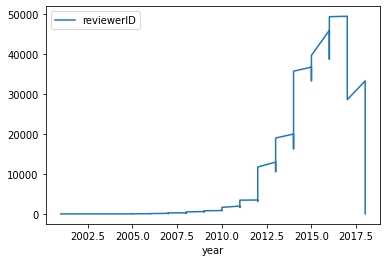

In [ ]:
gb_df.plot.line(x='year', y='reviewerID')

In [ ]:
x_gb = gb_df[['year']]
y_gb = gb_df['reviewerID']
model = LogisticRegression(random_state=32).fit(x_gb, y_gb)

In [ ]:
model.predict(x_gb)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(x_gb, y_gb)

0.0582010582010582

,month,reviewerID
0,01,205775
1,02,178118
2,03,194216
3,04,175443
4,05,168394
5,06,159444
6,07,174858
7,08,173092
8,09,158229
9,10,159763


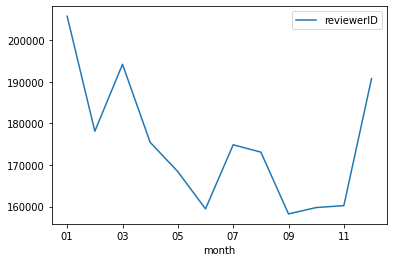

In [ ]:
mon = time_df.groupby('month').count().reset_index()[['month','reviewerID']]
mon.plot(x='month', y='reviewerID')
mon

,year,reviewerID
0,2001,1
1,2002,7
2,2003,8
3,2004,47
4,2005,177
5,2006,595
6,2007,2022
7,2008,4083
8,2009,7179
9,2010,12562


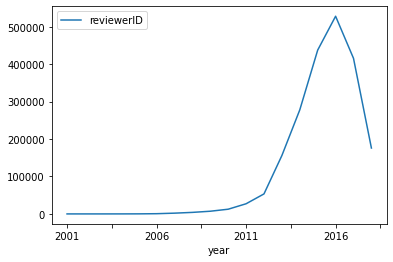

In [ ]:
year = time_df.groupby('year').count().reset_index()[['year','reviewerID']]
year.plot(x='year', y='reviewerID')
year

In [ ]:
x_gb = gb_df[['month']]
y_gb = gb_df['reviewerID']
model = LogisticRegression(random_state=32).fit(x_gb, y_gb)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.predict(x_gb)

array([1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(x_gb, y_gb)

0.0582010582010582

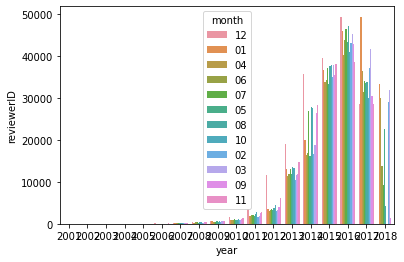

In [ ]:
sns.barplot(x='year', y='reviewerID', hue='month', data=gb_df);

In [ ]:
##df_3 into main 

In [ ]:
df_4 = df.groupby('reviewTime')[['reviewerID']].count().reset_index()
df_4['time'] = df_4['reviewTime'].str.replace(r' \d*, ', r'.', regex=True)
df_4.drop(df_4.index[0:4], inplace=True)
df_4= df_4.drop(columns=['reviewTime'])
df_4.head()

,reviewerID,time
4,17,01.2010
5,87,01.2011
6,86,01.2012
7,407,01.2013
8,704,01.2014


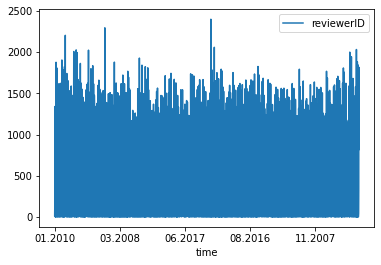

In [ ]:
df_4.sort_values(by=['time'])
df_4.plot.line(x='time', y='reviewerID')

In [ ]:
x = df_4[['time']]
y = df_4['reviewerID']
model = LogisticRegression().fit(x, y)
model.intercept_
model.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.0240696 ],
       [-0.02508407],
       [ 0.09931385],
       ...,
       [-0.29072285],
       [-0.21623844],
       [-0.02182216]])

In [ ]:
model.predict_proba(x)

array([[4.66963790e-02, 3.84505548e-02, 1.34027132e-02, ...,
        4.60006927e-04, 3.65395091e-04, 2.74631723e-04],
       [4.66966908e-02, 3.84506225e-02, 1.34029035e-02, ...,
        4.59995518e-04, 3.65388750e-04, 2.74632296e-04],
       [4.66970026e-02, 3.84506902e-02, 1.34030939e-02, ...,
        4.59984109e-04, 3.65382408e-04, 2.74632870e-04],
       ...,
       [4.37745517e-02, 2.09899579e-02, 2.87479815e-02, ...,
        1.35143657e-05, 2.43579104e-05, 1.55397249e-04],
       [4.37742717e-02, 2.09897205e-02, 2.87480140e-02, ...,
        1.35138539e-05, 2.43571693e-05, 1.55395542e-04],
       [4.37739918e-02, 2.09894831e-02, 2.87480465e-02, ...,
        1.35133421e-05, 2.43564282e-05, 1.55393835e-04]])

In [ ]:
model.predict(x)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model.score(x, y)

0.05393835616438356